In [16]:
!pip install scikit-learn pandas numpy matplotlib seaborn requests beautifulsoup4 lxml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import re
import requests
from bs4 import BeautifulSoup
import time
import pickle
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [17]:
class DataCollector:
    """
    Collecting sports and politics articles from various sources especially wikipedia and raw data.
    """

    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        self.sports_data = []
        self.politics_data = []

    def clean_text(self, text):
        """Clean and preprocess text"""
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
        # Remove special characters but keep basic punctuation
        text = re.sub(r'[^\w\s.,!?-]', '', text)
        return text.strip()

    def scrape_wikipedia_category(self, category_url, label, max_articles=50):
        """
        Scrape Wikipedia articles from a category
        """
        articles = []
        try:
            response = requests.get(category_url, headers=self.headers, timeout=10)
            soup = BeautifulSoup(response.content, 'html.parser')

            # Find article links
            links = soup.find_all('a', href=True)
            article_links = []

            for link in links:
                href = link['href']
                if href.startswith('/wiki/') and ':' not in href:
                    article_links.append('https://en.wikipedia.org' + href)

            # Scrape individual articles
            for i, article_url in enumerate(article_links[:max_articles]):
                try:
                    time.sleep(0.5)  # Be respectful to servers
                    article_response = requests.get(article_url, headers=self.headers, timeout=10)
                    article_soup = BeautifulSoup(article_response.content, 'html.parser')

                    # Extract content
                    content_div = article_soup.find('div', {'id': 'mw-content-text'})
                    if content_div:
                        paragraphs = content_div.find_all('p')
                        text = ' '.join([p.get_text() for p in paragraphs[:5]])  # First 5 paragraphs

                        if len(text) > 200:  # Minimum length
                            cleaned_text = self.clean_text(text)
                            articles.append({
                                'text': cleaned_text,
                                'label': label,
                                'source': 'wikipedia',
                                'url': article_url
                            })
                            print(f"Collected {label} article {i+1}/{max_articles}")

                except Exception as e:
                    print(f"Error scraping article: {e}")
                    continue

        except Exception as e:
            print(f"Error accessing category: {e}")

        return articles

    def create_synthetic_data(self):
        """
        Create synthetic sports and politics data as backup/supplement
        """
        # Sports articles
        sports_texts = [
            "The football match ended in a thrilling victory for the home team. The striker scored two goals in the final minutes of the game. Fans celebrated as their team advanced to the championship finals.",
            "The basketball player made an incredible three-pointer at the buzzer. The crowd went wild as the home team secured their playoff spot. The coach praised the team's defensive performance.",
            "The tennis champion won the grand slam tournament in straight sets. Her powerful serve and aggressive baseline play dominated the match. This victory marks her third major title this year.",
            "The cricket team posted a massive total of 350 runs in their innings. The opening batsman scored a brilliant century. The bowlers then restricted the opposition to win by 80 runs.",
            "The Olympic athlete broke the world record in the 100-meter sprint. His time of 9.58 seconds stunned the athletics world. He dedicated the victory to his coach and family.",
            "The soccer team signed a new striker for a record transfer fee. The player is expected to strengthen the team's attacking options. Fans are excited about the upcoming season.",
            "The boxing champion successfully defended his title with a knockout in the eighth round. His superior technique and conditioning were evident throughout the fight. He remains undefeated in his professional career.",
            "The hockey team won the Stanley Cup after a intense seven-game series. The goaltender made crucial saves in overtime to secure the championship. The city celebrated with a massive parade.",
            "The marathon runner completed the race in record time despite challenging weather conditions. Her strategic pacing and mental toughness carried her to victory. She plans to compete in the Olympics next year.",
            "The baseball team hit three home runs in the ninth inning to complete a remarkable comeback victory. The fans remained loyal throughout the deficit. This win keeps their playoff hopes alive.",
            "The Formula One driver claimed pole position with a stunning qualifying lap. His car showed exceptional speed through the technical sections. Tomorrow's race promises to be exciting.",
            "The rugby team dominated the scrum and scored five tries in a convincing victory. Their forward pack controlled possession throughout the match. The captain praised the team's discipline.",
            "The volleyball team won the championship with a straight-sets victory in the final. Their blocking and serving were exceptional. The setter orchestrated the offense brilliantly.",
            "The golf tournament ended with a playoff after two players tied at the top of the leaderboard. The dramatic finish captivated viewers worldwide. The winner sank a 30-foot putt on the first extra hole.",
            "The swimming champion won four gold medals at the world championships. Her versatility across different strokes impressed coaches and competitors alike. She broke two national records.",
            "The cycling team won the stage with a perfectly timed sprint finish. The lead-out train worked flawlessly in the final kilometer. The victory extends their lead in the team classification.",
            "The mixed martial arts fighter won by submission in the second round. His ground game proved too strong for his opponent. This victory earned him a title shot.",
            "The track and field athlete threw a personal best in the javelin competition. The throw of 85 meters secured the gold medal. Years of training finally paid off.",
            "The badminton player won the tournament without dropping a single set. Her quick reflexes and deceptive shots confused opponents. She climbed to number two in the world rankings.",
            "The table tennis match went to five sets in an epic battle. Both players displayed incredible skill and stamina. The winner advanced to face the defending champion."
        ]

        # Politics articles
        politics_texts = [
            "The parliament passed the new healthcare bill after months of debate. The legislation aims to expand coverage to millions of uninsured citizens. Opposition parties criticized the cost implications.",
            "The president announced a comprehensive economic stimulus package to boost growth. The plan includes tax cuts and infrastructure investments. Economists are divided on its potential effectiveness.",
            "The election campaign entered its final week with polls showing a tight race. Both candidates held rallies in key swing states. Voter turnout is expected to be historically high.",
            "The prime minister addressed the nation regarding the new foreign policy initiative. The speech emphasized international cooperation and diplomatic engagement. Allied nations expressed support for the approach.",
            "The senate committee held hearings on climate change legislation. Scientists and industry representatives testified about environmental impacts. A vote is scheduled for next month.",
            "The government unveiled its annual budget proposal with increased spending on education. The finance minister highlighted investments in schools and universities. Critics questioned the revenue projections.",
            "The constitutional court ruled on a controversial civil rights case. The decision was hailed as a landmark victory for equality. Legal experts analyzed its broader implications.",
            "The diplomatic summit between world leaders concluded with a joint declaration on trade. The agreement reduces tariffs and promotes economic cooperation. Business groups welcomed the development.",
            "The governor signed an executive order addressing housing affordability. The policy includes incentives for developers and rent control measures. Housing advocates called it a positive step.",
            "The congressional investigation released its final report on government spending. The findings revealed inefficiencies and recommended reforms. Lawmakers pledged to implement changes.",
            "The mayor announced a major urban development project to revitalize downtown. The plan includes new parks, transit options, and affordable housing. Community meetings will gather public input.",
            "The international treaty on nuclear disarmament was ratified by member nations. The accord sets timelines for reducing weapons stockpiles. Peace organizations celebrated the achievement.",
            "The political party elected new leadership at its national convention. The party platform emphasizes economic justice and environmental protection. Delegates approved the policy agenda unanimously.",
            "The referendum on constitutional amendments passed with strong support. Citizens voted to strengthen anti-corruption provisions and term limits. The changes take effect next year.",
            "The state legislature debated pension reform to address funding shortfalls. Union representatives voiced concerns about benefit reductions. A compromise proposal is being negotiated.",
            "The defense minister outlined plans for military modernization and equipment upgrades. The strategy focuses on cyber capabilities and rapid response forces. Funding will increase over five years.",
            "The trade negotiations concluded with a bilateral agreement on agricultural products. Farmers in both countries expect to benefit from expanded market access. The pact requires parliamentary approval.",
            "The immigration reform bill advanced through committee with bipartisan support. The legislation balances border security with pathways to citizenship. Advocacy groups praised the balanced approach.",
            "The central bank adjusted interest rates to combat rising inflation. The monetary policy committee cited economic indicators in its decision. Financial markets reacted with volatility.",
            "The ethics commission investigated allegations of conflicts of interest. Several officials were called to testify under oath. The inquiry could lead to sanctions or prosecutions."
        ]

        sports_data = [{'text': text, 'label': 'sports', 'source': 'synthetic'}
                      for text in sports_texts]
        politics_data = [{'text': text, 'label': 'politics', 'source': 'synthetic'}
                        for text in politics_texts]

        return sports_data + politics_data

    def collect_wikipedia_data(self):
        """
        Collect real Wikipedia articles
        """
        sports_urls = [
            "https://en.wikipedia.org/wiki/2024_Summer_Olympics",
            "https://en.wikipedia.org/wiki/FIFA_World_Cup",
            "https://en.wikipedia.org/wiki/NBA_Finals",
            "https://en.wikipedia.org/wiki/Cricket_World_Cup",
            "https://en.wikipedia.org/wiki/Super_Bowl",
            "https://en.wikipedia.org/wiki/Wimbledon_Championships",
            "https://en.wikipedia.org/wiki/UEFA_Champions_League",
            "https://en.wikipedia.org/wiki/Indian_Premier_League",
        ]

        politics_urls = [
            "https://en.wikipedia.org/wiki/2024_United_States_elections",
            "https://en.wikipedia.org/wiki/United_States_Congress",
            "https://en.wikipedia.org/wiki/European_Parliament",
            "https://en.wikipedia.org/wiki/United_Nations",
            "https://en.wikipedia.org/wiki/G20",
            "https://en.wikipedia.org/wiki/Brexit",
            "https://en.wikipedia.org/wiki/Indian_Parliament",
            "https://en.wikipedia.org/wiki/NATO",
        ]

        articles = []

        # Scrape sports articles
        for url in sports_urls:
            try:
                response = requests.get(url, headers=self.headers, timeout=10)
                soup = BeautifulSoup(response.content, 'html.parser')

                paragraphs = soup.find_all('p')
                text = ' '.join([p.get_text() for p in paragraphs[:10]])

                if len(text) > 200:
                    articles.append({
                        'text': self.clean_text(text),
                        'label': 'sports',
                        'source': 'wikipedia',
                        'url': url
                    })
                    print(f"Collected sports article from {url}")
                time.sleep(1)
            except Exception as e:
                print(f"Error: {e}")

        # Scrape politics articles
        for url in politics_urls:
            try:
                response = requests.get(url, headers=self.headers, timeout=10)
                soup = BeautifulSoup(response.content, 'html.parser')

                paragraphs = soup.find_all('p')
                text = ' '.join([p.get_text() for p in paragraphs[:10]])

                if len(text) > 200:
                    articles.append({
                        'text': self.clean_text(text),
                        'label': 'politics',
                        'source': 'wikipedia',
                        'url': url
                    })
                    print(f"Collected politics article from {url}")
                time.sleep(1)
            except Exception as e:
                print(f"Error: {e}")

        return articles

    def collect_all_data(self):
        """
        Collect data from multiple sources
        """
        print("Starting data collection...")
        print("=" * 70)

        # Collect Wikipedia data
        print("\nCollecting Wikipedia articles...")
        wiki_data = self.collect_wikipedia_data()
        print(f"Collected {len(wiki_data)} Wikipedia articles")

        # Generate synthetic data
        print("\nGenerating synthetic data...")
        synthetic_data = self.create_synthetic_data()
        print(f"Generated {len(synthetic_data)} synthetic articles")

        # Combine all data
        all_data = wiki_data + synthetic_data

        print(f"\nTotal articles collected: {len(all_data)}")
        sports_count = sum(1 for d in all_data if d['label'] == 'sports')
        politics_count = sum(1 for d in all_data if d['label'] == 'politics')
        print(f"Sports articles: {sports_count}")
        print(f"Politics articles: {politics_count}")

        return pd.DataFrame(all_data)

# Initialize and collect data
collector = DataCollector()
df = collector.collect_all_data()

print("\n" + "=" * 70)
print("Data Collection Complete!")
print("=" * 70)
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Starting data collection...

Collected sports article from https://en.wikipedia.org/wiki/2024_Summer_Olympics
Collected sports article from https://en.wikipedia.org/wiki/FIFA_World_Cup
Collected sports article from https://en.wikipedia.org/wiki/NBA_Finals
Collected sports article from https://en.wikipedia.org/wiki/Cricket_World_Cup
Collected sports article from https://en.wikipedia.org/wiki/Super_Bowl
Collected sports article from https://en.wikipedia.org/wiki/Wimbledon_Championships
Collected sports article from https://en.wikipedia.org/wiki/UEFA_Champions_League
Collected sports article from https://en.wikipedia.org/wiki/Indian_Premier_League
Collected politics article from https://en.wikipedia.org/wiki/2024_United_States_elections
Collected politics article from https://en.wikipedia.org/wiki/United_States_Congress
Collected politics article from https://en.wikipedia.org/wiki/European_Parliament
Collected politics article from https://en.wikipedia.org/wiki/United_Nations
Collected po

In [18]:
# Here we are tring to expand the dataset with more varied examples

def create_extended_dataset():
    """
    Create an extended dataset with more diverse examples
    """

    sports_articles = [
        # Football/Soccer
        "The striker completed his hat-trick with a stunning free-kick in injury time. The goalkeeper had no chance as the ball curled into the top corner. This victory keeps the team's title hopes alive with three matches remaining in the season.",
        "The manager made three tactical substitutions that changed the game completely. The fresh legs in midfield allowed the team to control possession and create chances. The captain scored the winning goal from a corner kick.",
        "The derby match lived up to its billing with end-to-end action throughout ninety minutes. Both teams had chances to win but defensive errors led to a share of the points. The referee issued six yellow cards in a heated encounter.",

        # Basketball
        "The point guard orchestrated a perfect fourth-quarter comeback with seven assists and clutch shooting. His leadership on the court inspired teammates to raise their defensive intensity. The arena erupted as the buzzer sounded on their victory.",
        "The rookie sensation dropped 35 points on efficient shooting in just his fifth NBA game. His combination of speed and court vision reminded analysts of hall-of-fame players. Scouts praised his work ethic and basketball IQ.",
        "The championship series went to game seven after an incredible defensive performance. The center grabbed 18 rebounds and blocked five shots to anchor the defense. Fans witnessed one of the greatest finals in league history.",

        # Tennis
        "The unseeded player shocked the tennis world by defeating the top seed in straight sets. Her aggressive return game and powerful groundstrokes overwhelmed the favorite. This breakthrough performance launches her into the top twenty rankings.",
        "The five-set marathon lasted over four hours in sweltering conditions. Both players showed incredible mental fortitude and physical conditioning. The winner collapsed in exhaustion after converting championship point.",
        "The doubles pair combined for 15 aces and won 90% of points on first serve. Their chemistry and communication on court proved too strong for opponents. They claimed their third grand slam title together.",

        # Cricket
        "The fast bowler took six wickets in a devastating spell of swing bowling. The opposition batting lineup collapsed from 150 for two to all out for 180. His figures of six for 35 earned him player of the match honors.",
        "The captain's century paced the successful run chase on a difficult pitch. His partnership with the vice-captain added 150 runs and steadied the innings. The team reached the target with five wickets and two overs to spare.",
        "The all-rounder's match-winning performance included 75 runs and four wickets. His ability to contribute with both bat and ball makes him invaluable to the team. Selectors confirmed his place for the upcoming tournament.",

        # Olympics
        "The gymnast executed a flawless routine on the balance beam to claim gold. Her difficulty score and perfect execution impressed judges and spectators alike. Years of training culminated in this Olympic moment.",
        "The relay team shattered the world record with seamless baton exchanges. Each runner delivered a personal best in their leg of the race. The national anthem played as they stood atop the podium.",
        "The diver performed a reverse three-and-a-half somersault with minimal splash. The judges awarded near-perfect scores for technique and execution. This dive secured her second Olympic gold medal.",

        # More sports
        "The heavyweight boxer defended his championship belt with a technical knockout. His combination punching and ring generalship controlled the fight from the opening bell. He called out potential challengers in his post-fight interview.",
        "The hockey team's power play unit scored three goals in crucial moments. The defensemen pinched effectively to maintain offensive zone pressure. Their special teams excellence proved decisive in the playoff series.",
        "The golfer sank a 40-foot birdie putt on the 72nd hole to win the tournament. His calm demeanor under pressure separated him from the field. This victory qualifies him for next year's Masters.",
        "The sprinter exploded out of the blocks and maintained perfect form to the finish line. His time of 9.81 seconds ranks among the fastest ever recorded. Olympic selectors immediately named him to the team.",
        "The volleyball team's blocking and serving disrupted the opponent's offensive rhythm. The middle blocker recorded eight blocks and three aces. Their championship experience showed in the final set.",
    ]

    politics_articles = [
        # Domestic Policy
        "The legislature passed sweeping education reform after lengthy negotiations between parties. The bill increases teacher salaries and allocates funding for classroom technology. Implementation begins in the next fiscal year with bipartisan support.",
        "The governor vetoed the controversial tax bill citing concerns about revenue projections. Her decision sparked debate about budget priorities and economic policy. Legislative leaders vowed to override the veto with a supermajority vote.",
        "The housing affordability crisis dominated city council discussions this week. Councilmembers proposed zoning changes to encourage dense residential development. Community stakeholders presented varying opinions on the proposals.",

        # Foreign Policy
        "The diplomatic summit produced a framework for peace negotiations in the region. Both sides agreed to ceasefire terms and prisoner exchanges. International observers will monitor compliance with the agreement.",
        "The ambassador presented credentials to the host nation's head of state. This marks a new chapter in bilateral relations between the countries. Trade and cultural exchanges are expected to increase significantly.",
        "The foreign minister addressed concerns about humanitarian aid delivery to crisis zones. International cooperation is essential to reaching affected populations. Several nations pledged additional resources and logistical support.",

        # Elections
        "The candidate unveiled a comprehensive platform addressing healthcare and economy. Campaign strategists targeted swing districts with tailored messaging. Polling indicates a competitive race heading into the final weeks.",
        "Voter registration drives increased participation among young citizens and minorities. Advocacy organizations credited grassroots mobilization efforts. Election officials prepared for record turnout at polling stations.",
        "The debate featured sharp exchanges on climate policy and infrastructure spending. Both candidates sought to appeal to undecided voters in crucial states. Post-debate analysis focused on fact-checking and rhetorical strategies.",

        # Judicial
        "The supreme court heard oral arguments in a landmark civil liberties case. Constitutional scholars attended the proceedings to analyze judicial questions. A decision is expected before the end of the term.",
        "The attorney general announced new guidelines for prosecuting white-collar crime. Enhanced penalties target corporate fraud and insider trading. Business groups expressed concerns about regulatory burden.",
        "The judicial nomination advanced through committee despite partisan objections. The nominee's record on consumer protection drew scrutiny from senators. A floor vote is scheduled for next week.",

        # Economic Policy
        "The central bank maintained interest rates while signaling future policy flexibility. Economic indicators show moderate growth and stable employment. Inflation remains within the target range for now.",
        "The trade representative negotiated market access provisions for agricultural exports. Farmers and ranchers welcomed the expanded opportunities abroad. The agreement requires congressional ratification to take effect.",
        "The treasury department released economic forecasts projecting steady expansion. Revenue collections exceeded expectations for the quarter. Deficit reduction remains a long-term fiscal challenge.",

        # Social Issues
        "The civil rights commission investigated complaints of discrimination in housing markets. Testimony from affected individuals highlighted systemic barriers. Recommendations will inform future enforcement actions.",
        "The health department launched a public awareness campaign on preventive care. Statistics show improved outcomes from early screening and intervention. Funding supports community health centers in underserved areas.",
        "The environmental agency proposed stricter standards for air quality. Scientific evidence links pollution to respiratory illness. Industry representatives requested extended compliance timelines.",

        # Administrative
        "The ethics board reviewed disclosure statements from government officials. Transparency requirements aim to prevent conflicts of interest. Several officials amended their filings after initial review.",
        "The civil service commission addressed workforce development and retention. Competitive salaries are necessary to attract qualified candidates. A recruitment initiative targets recent graduates and career changers.",
        "The inspector general's audit identified inefficiencies in procurement processes. Recommendations include centralizing purchasing and negotiating volume discounts. Agency leadership committed to implementing reforms.",
    ]

    # Creating DataFrame
    sports_df = pd.DataFrame({
        'text': sports_articles,
        'label': 'sports',
        'source': 'extended_synthetic'
    })

    politics_df = pd.DataFrame({
        'text': politics_articles,
        'label': 'politics',
        'source': 'extended_synthetic'
    })

    extended_df = pd.concat([sports_df, politics_df], ignore_index=True)

    return extended_df

# Creating extended dataset
extended_df = create_extended_dataset()

# Combining with previous data
df = pd.concat([df, extended_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Extended Dataset Created!")
print("=" * 70)
print(f"Total samples: {len(df)}")
print(f"\nClass distribution:")
print(df['label'].value_counts())
print(f"\nDataset preview:")
print(df.head(10))

# Save dataset
df.to_csv('sports_politics_dataset.csv', index=False)
print("\nDataset saved to 'sports_politics_dataset.csv'")

Extended Dataset Created!
Total samples: 97

Class distribution:
label
politics    49
sports      48
Name: count, dtype: int64

Dataset preview:
                                                text     label  \
0  The unseeded player shocked the tennis world b...    sports   
1  The senate committee held hearings on climate ...  politics   
2  The environmental agency proposed stricter sta...  politics   
3  The tennis champion won the grand slam tournam...    sports   
4  The foreign minister addressed concerns about ...  politics   
5  Voter registration drives increased participat...  politics   
6  The doubles pair combined for 15 aces and won ...    sports   
7  The constitutional court ruled on a controvers...  politics   
8  Part of the Commission with mixed support Mixe...  politics   
9  The 2024 Summer Olympics French Les Jeux Olymp...    sports   

               source                                                url  
0  extended_synthetic                                

EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW
----------------------------------------------------------------------
Total samples: 97
Features: ['text', 'label', 'source', 'url']

Missing values:
text       0
label      0
source     0
url       81
dtype: int64

2. CLASS DISTRIBUTION
----------------------------------------------------------------------
label
politics    49
sports      48
Name: count, dtype: int64

Class balance ratio: 0.98

3. TEXT LENGTH ANALYSIS
----------------------------------------------------------------------

Character length statistics:
          count        mean          std    min    25%    50%     75%     max
label                                                                        
politics   49.0  859.918367  1591.421833  177.0  195.0  205.0  227.00  6529.0
sports     48.0  917.791667  1662.630484  159.0  187.0  205.5  230.25  5654.0

Word count statistics:
          count        mean         std   min   25%   50%    75%     max
label              

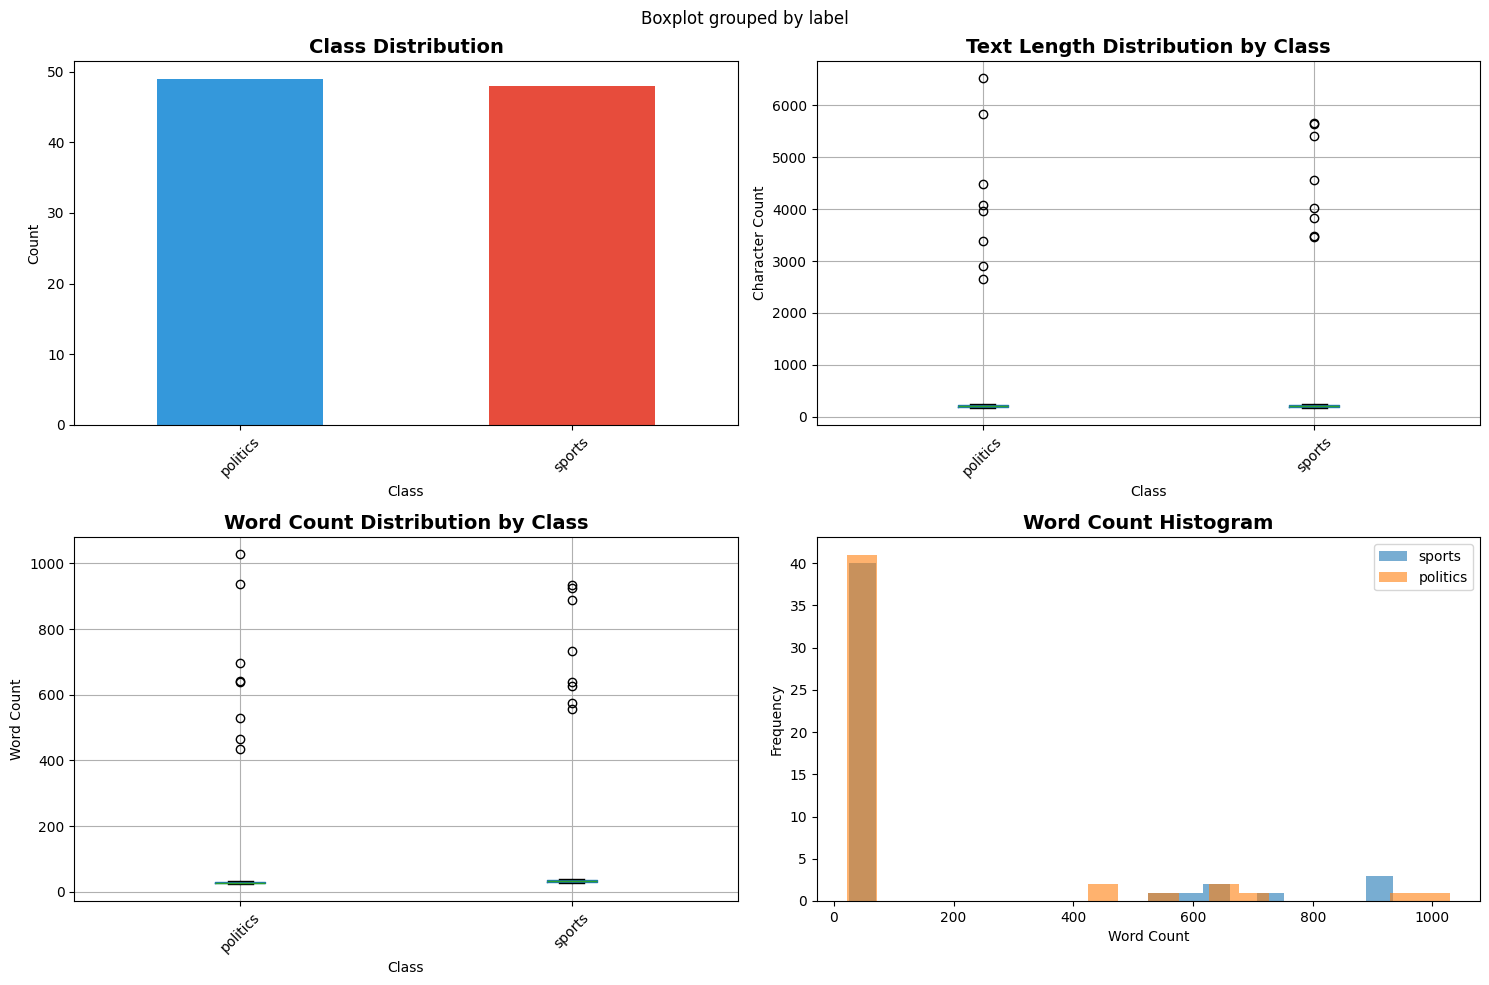


4. COMMON WORDS ANALYSIS
----------------------------------------------------------------------

Top 15 words in SPORTS articles:
  world          :  48
  first          :  48
  tournament     :  39
  won            :  37
  their          :  31
  football       :  31
  teams          :  30
  team           :  27
  super          :  27
  two            :  26
  league         :  26
  cricket        :  26
  his            :  25
  bowl           :  25
  champions      :  25

Top 15 words in POLITICS articles:
  parliament     :  30
  european       :  29
  its            :  27
  which          :  25
  united         :  24
  union          :  21
  international  :  20
  new            :  20
  members        :  18
  after          :  18
  first          :  18
  states         :  18
  minister       :  16
  legislative    :  16
  president      :  16


In [19]:
# Now we will perform first step of data preprocessing Exploratory Data Analysis (EDA)

def perform_eda(df):
    """
    Perform comprehensive exploratory data analysis
    """
    print("=" * 70)
    print("EXPLORATORY DATA ANALYSIS")
    print("=" * 70)

    # Basic statistics
    print("\n1. DATASET OVERVIEW")
    print("-" * 70)
    print(f"Total samples: {len(df)}")
    print(f"Features: {df.columns.tolist()}")
    print(f"\nMissing values:")
    print(df.isnull().sum())

    # Class distribution
    print("\n2. CLASS DISTRIBUTION")
    print("-" * 70)
    class_counts = df['label'].value_counts()
    print(class_counts)
    print(f"\nClass balance ratio: {class_counts.min() / class_counts.max():.2f}")

    # Text length analysis
    print("\n3. TEXT LENGTH ANALYSIS")
    print("-" * 70)
    df['text_length'] = df['text'].apply(len)
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))

    print("\nCharacter length statistics:")
    print(df.groupby('label')['text_length'].describe())

    print("\nWord count statistics:")
    print(df.groupby('label')['word_count'].describe())

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Class distribution
    df['label'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e74c3c'])
    axes[0, 0].set_title('Class Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Class')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Plot 2: Text length distribution
    df.boxplot(column='text_length', by='label', ax=axes[0, 1])
    axes[0, 1].set_title('Text Length Distribution by Class', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Class')
    axes[0, 1].set_ylabel('Character Count')
    plt.sca(axes[0, 1])
    plt.xticks(rotation=45)

    # Plot 3: Word count distribution
    df.boxplot(column='word_count', by='label', ax=axes[1, 0])
    axes[1, 0].set_title('Word Count Distribution by Class', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Class')
    axes[1, 0].set_ylabel('Word Count')
    plt.sca(axes[1, 0])
    plt.xticks(rotation=45)

    # Plot 4: Text length histogram
    for label in df['label'].unique():
        subset = df[df['label'] == label]['word_count']
        axes[1, 1].hist(subset, alpha=0.6, label=label, bins=20)
    axes[1, 1].set_title('Word Count Histogram', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Word Count')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.savefig('eda_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Most common words analysis
    print("\n4. COMMON WORDS ANALYSIS")
    print("-" * 70)

    def get_top_words(texts, n=15):
        """Get top n words from texts"""
        words = ' '.join(texts).lower().split()
        # Remove common stop words
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
                     'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'been',
                     'be', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
                     'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that',
                     'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they'}
        words = [w for w in words if w not in stop_words and len(w) > 2]
        return Counter(words).most_common(n)

    for label in df['label'].unique():
        texts = df[df['label'] == label]['text'].tolist()
        top_words = get_top_words(texts, 15)
        print(f"\nTop 15 words in {label.upper()} articles:")
        for word, count in top_words:
            print(f"  {word:15s}: {count:3d}")

    return df

# Perform EDA
df = perform_eda(df)

In [20]:
#  Now we will perform Feature Extraction - Bag of Words, TF-IDF, N-grams

class FeatureExtractor:
    """
    Extract different types of features from text data
    """

    def __init__(self):
        self.vectorizers = {}
        self.feature_names = {}

    def extract_bow_features(self, X_train, X_test, max_features=1000):
        """
        Extract Bag of Words features
        """
        print("\nExtracting Bag of Words features...")
        vectorizer = CountVectorizer(
            max_features=max_features,
            lowercase=True,
            stop_words='english'
        )

        X_train_bow = vectorizer.fit_transform(X_train)
        X_test_bow = vectorizer.transform(X_test)

        self.vectorizers['bow'] = vectorizer
        self.feature_names['bow'] = vectorizer.get_feature_names_out()

        print(f"BoW features shape: {X_train_bow.shape}")
        return X_train_bow, X_test_bow

    def extract_tfidf_features(self, X_train, X_test, max_features=1000):
        """
        Extract TF-IDF features
        """
        print("\nExtracting TF-IDF features...")
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            lowercase=True,
            stop_words='english'
        )

        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        self.vectorizers['tfidf'] = vectorizer
        self.feature_names['tfidf'] = vectorizer.get_feature_names_out()

        print(f"TF-IDF features shape: {X_train_tfidf.shape}")
        return X_train_tfidf, X_test_tfidf

    def extract_ngram_features(self, X_train, X_test, ngram_range=(1, 2), max_features=1000):
        """
        Extract N-gram features with TF-IDF
        """
        print(f"\nExtracting {ngram_range}-gram features...")
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            lowercase=True,
            stop_words='english',
            ngram_range=ngram_range
        )

        X_train_ngram = vectorizer.fit_transform(X_train)
        X_test_ngram = vectorizer.transform(X_test)

        self.vectorizers[f'{ngram_range}-gram'] = vectorizer
        self.feature_names[f'{ngram_range}-gram'] = vectorizer.get_feature_names_out()

        print(f"{ngram_range}-gram features shape: {X_train_ngram.shape}")
        return X_train_ngram, X_test_ngram

    def show_top_features(self, label_idx, class_name, top_n=20):
        """
        Display top features for each feature type
        """
        print(f"\n{'='*70}")
        print(f"TOP {top_n} FEATURES FOR {class_name.upper()}")
        print(f"{'='*70}")

        for feat_type, vectorizer in self.vectorizers.items():
            print(f"\n{feat_type.upper()} Features:")
            print("-" * 70)

            # Get feature importance (for TF-IDF based methods)
            if hasattr(vectorizer, 'idf_'):
                feature_names = self.feature_names[feat_type]
                # This is a simplified approach - in practice you'd want class-specific scores
                print(f"Top features: {', '.join(feature_names[:top_n])}")

# Prepare data
print("=" * 70)
print("FEATURE EXTRACTION")
print("=" * 70)

# Split data
X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Extract features
extractor = FeatureExtractor()

# 1. Bag of Words
X_train_bow, X_test_bow = extractor.extract_bow_features(X_train, X_test, max_features=1000)

# 2. TF-IDF
X_train_tfidf, X_test_tfidf = extractor.extract_tfidf_features(X_train, X_test, max_features=1000)

# 3. Bigrams
X_train_bigram, X_test_bigram = extractor.extract_ngram_features(
    X_train, X_test, ngram_range=(1, 2), max_features=1000
)

# 4. Trigrams
X_train_trigram, X_test_trigram = extractor.extract_ngram_features(
    X_train, X_test, ngram_range=(1, 3), max_features=1000
)

print("\n" + "=" * 70)
print("Feature extraction complete!")
print("=" * 70)

FEATURE EXTRACTION

Train set size: 77
Test set size: 20

Extracting Bag of Words features...
BoW features shape: (77, 1000)

Extracting TF-IDF features...
TF-IDF features shape: (77, 1000)

Extracting (1, 2)-gram features...
(1, 2)-gram features shape: (77, 1000)

Extracting (1, 3)-gram features...
(1, 3)-gram features shape: (77, 1000)

Feature extraction complete!


In [21]:
# Here we are gonna  Train Multiple ML Models

class ModelTrainer:
    """
    Train and evaluate multiple machine learning models
    """

    def __init__(self):
        self.models = {}
        self.results = {}

    def train_naive_bayes(self, X_train, y_train, X_test, y_test, feature_name):
        """
        Train Multinomial Naive Bayes
        """
        print(f"\nTraining Naive Bayes with {feature_name} features...")

        model = MultinomialNB()
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='sports', average='weighted')
        recall = recall_score(y_test, y_pred, pos_label='sports', average='weighted')
        f1 = f1_score(y_test, y_pred, pos_label='sports', average='weighted')

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        model_key = f"NaiveBayes_{feature_name}"
        self.models[model_key] = model
        self.results[model_key] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return model

    def train_logistic_regression(self, X_train, y_train, X_test, y_test, feature_name):
        """
        Train Logistic Regression
        """
        print(f"\nTraining Logistic Regression with {feature_name} features...")

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='sports', average='weighted')
        recall = recall_score(y_test, y_pred, pos_label='sports', average='weighted')
        f1 = f1_score(y_test, y_pred, pos_label='sports', average='weighted')

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        model_key = f"LogisticRegression_{feature_name}"
        self.models[model_key] = model
        self.results[model_key] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return model

    def train_svm(self, X_train, y_train, X_test, y_test, feature_name):
        """
        Train Support Vector Machine
        """
        print(f"\nTraining SVM with {feature_name} features...")

        model = SVC(kernel='linear', random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='sports', average='weighted')
        recall = recall_score(y_test, y_pred, pos_label='sports', average='weighted')
        f1 = f1_score(y_test, y_pred, pos_label='sports', average='weighted')

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        model_key = f"SVM_{feature_name}"
        self.models[model_key] = model
        self.results[model_key] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return model

    def train_random_forest(self, X_train, y_train, X_test, y_test, feature_name):
        """
        Train Random Forest
        """
        print(f"\nTraining Random Forest with {feature_name} features...")

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='sports', average='weighted')
        recall = recall_score(y_test, y_pred, pos_label='sports', average='weighted')
        f1 = f1_score(y_test, y_pred, pos_label='sports', average='weighted')

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

        model_key = f"RandomForest_{feature_name}"
        self.models[model_key] = model
        self.results[model_key] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return model

# Train all models
print("=" * 70)
print("MODEL TRAINING")
print("=" * 70)

trainer = ModelTrainer()

# Define feature sets
feature_sets = {
    'BoW': (X_train_bow, X_test_bow),
    'TF-IDF': (X_train_tfidf, X_test_tfidf),
    'Bigram': (X_train_bigram, X_test_bigram),
}

# Train each model with each feature set
for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\n{'='*70}")
    print(f"Training with {feature_name} features")
    print(f"{'='*70}")

    # Naive Bayes
    trainer.train_naive_bayes(X_tr, y_train, X_te, y_test, feature_name)

    # Logistic Regression
    trainer.train_logistic_regression(X_tr, y_train, X_te, y_test, feature_name)

    # SVM
    trainer.train_svm(X_tr, y_train, X_te, y_test, feature_name)

    # Random Forest
    trainer.train_random_forest(X_tr, y_train, X_te, y_test, feature_name)

print("\n" + "=" * 70)
print("All models trained successfully!")
print("=" * 70)

MODEL TRAINING

Training with BoW features

Training Naive Bayes with BoW features...
Accuracy: 1.0000
Cross-validation: 0.9733 (+/- 0.0533)

Training Logistic Regression with BoW features...
Accuracy: 0.9500
Cross-validation: 0.9733 (+/- 0.0327)

Training SVM with BoW features...
Accuracy: 0.9500
Cross-validation: 0.9733 (+/- 0.0327)

Training Random Forest with BoW features...
Accuracy: 0.9000
Cross-validation: 0.9733 (+/- 0.0327)

Training with TF-IDF features

Training Naive Bayes with TF-IDF features...
Accuracy: 1.0000
Cross-validation: 1.0000 (+/- 0.0000)

Training Logistic Regression with TF-IDF features...
Accuracy: 1.0000
Cross-validation: 0.9867 (+/- 0.0267)

Training SVM with TF-IDF features...
Accuracy: 1.0000
Cross-validation: 0.9867 (+/- 0.0267)

Training Random Forest with TF-IDF features...
Accuracy: 0.8500
Cross-validation: 0.9342 (+/- 0.0597)

Training with Bigram features

Training Naive Bayes with Bigram features...
Accuracy: 1.0000
Cross-validation: 1.0000 (+/- 0.

MODEL COMPARISON

Complete Results Table:
----------------------------------------------------------------------
             Model Features  Accuracy  Precision  Recall  F1-Score  CV Mean   CV Std
        NaiveBayes      BoW      1.00   1.000000    1.00  1.000000 0.973333 0.053333
               SVM   TF-IDF      1.00   1.000000    1.00  1.000000 0.986667 0.026667
LogisticRegression   TF-IDF      1.00   1.000000    1.00  1.000000 0.986667 0.026667
        NaiveBayes   TF-IDF      1.00   1.000000    1.00  1.000000 1.000000 0.000000
               SVM   Bigram      1.00   1.000000    1.00  1.000000 0.973333 0.032660
LogisticRegression   Bigram      1.00   1.000000    1.00  1.000000 0.986667 0.026667
        NaiveBayes   Bigram      1.00   1.000000    1.00  1.000000 1.000000 0.000000
LogisticRegression      BoW      0.95   0.954545    0.95  0.949875 0.973333 0.032660
               SVM      BoW      0.95   0.954545    0.95  0.949875 0.973333 0.032660
      RandomForest      BoW      0.90

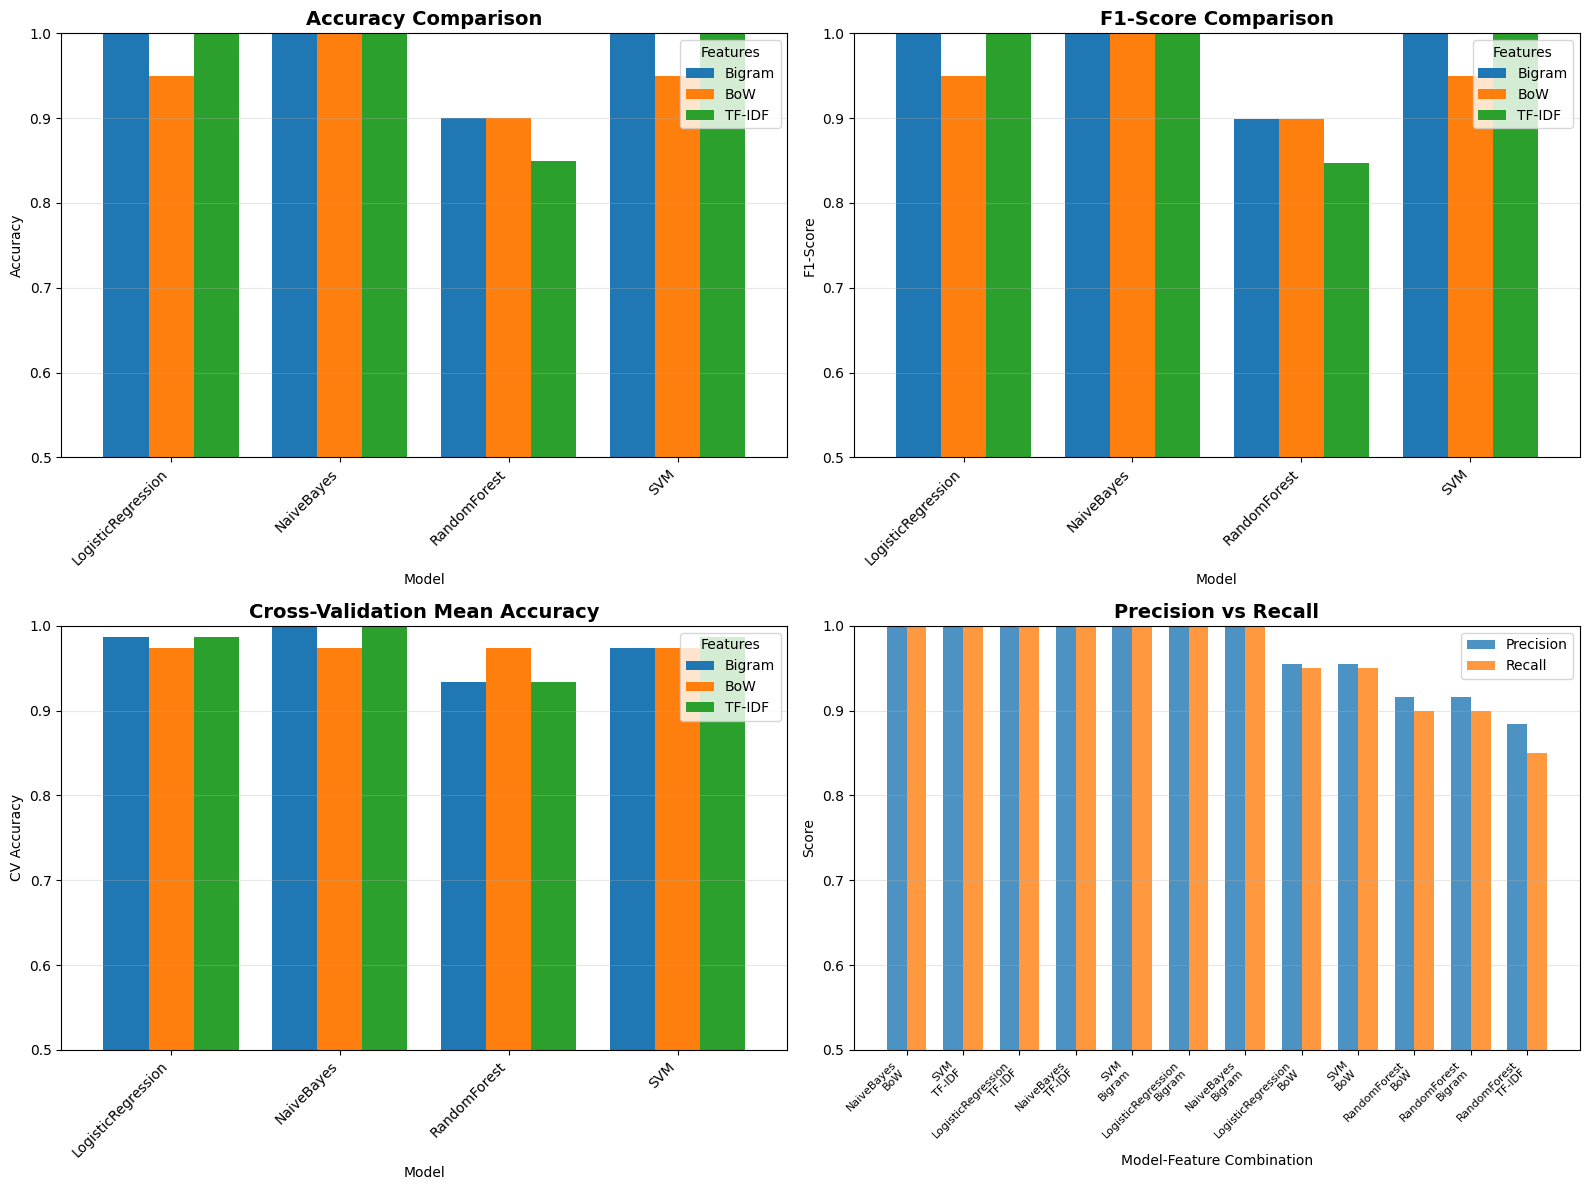


BEST PERFORMING MODEL
Model: NaiveBayes
Features: BoW
Accuracy: 1.0000
F1-Score: 1.0000
Cross-validation: 0.9733 (+/- 0.0533)


In [22]:
# Comparing  Results and Creating Visualizations

def compare_all_results(trainer):
    print("=" * 70)
    print("MODEL COMPARISON")
    print("=" * 70)

    # Create results DataFrame
    results_data = []
    for model_name, metrics in trainer.results.items():
        model_type, feature_type = model_name.split('_', 1)
        results_data.append({
            'Model': model_type,
            'Features': feature_type,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1_score'],
            'CV Mean': metrics['cv_mean'],
            'CV Std': metrics['cv_std']
        })

    results_df = pd.DataFrame(results_data)
    results_df = results_df.sort_values('Accuracy', ascending=False)

    print("\nComplete Results Table:")
    print("-" * 70)
    print(results_df.to_string(index=False))

    # Save results
    results_df.to_csv('model_comparison_results.csv', index=False)
    print("\nResults saved to 'model_comparison_results.csv'")

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Accuracy comparison
    pivot_accuracy = results_df.pivot(index='Model', columns='Features', values='Accuracy')
    pivot_accuracy.plot(kind='bar', ax=axes[0, 0], width=0.8)
    axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_xlabel('Model')
    axes[0, 0].legend(title='Features')
    axes[0, 0].set_ylim([0.5, 1.0])
    axes[0, 0].grid(axis='y', alpha=0.3)
    plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Plot 2: F1-Score comparison
    pivot_f1 = results_df.pivot(index='Model', columns='Features', values='F1-Score')
    pivot_f1.plot(kind='bar', ax=axes[0, 1], width=0.8)
    axes[0, 1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].set_xlabel('Model')
    axes[0, 1].legend(title='Features')
    axes[0, 1].set_ylim([0.5, 1.0])
    axes[0, 1].grid(axis='y', alpha=0.3)
    plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Plot 3: Cross-validation scores
    pivot_cv = results_df.pivot(index='Model', columns='Features', values='CV Mean')
    pivot_cv.plot(kind='bar', ax=axes[1, 0], width=0.8)
    axes[1, 0].set_title('Cross-Validation Mean Accuracy', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('CV Accuracy')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].legend(title='Features')
    axes[1, 0].set_ylim([0.5, 1.0])
    axes[1, 0].grid(axis='y', alpha=0.3)
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Plot 4: Precision-Recall comparison
    x_pos = np.arange(len(results_df))
    width = 0.35
    axes[1, 1].bar(x_pos - width/2, results_df['Precision'], width, label='Precision', alpha=0.8)
    axes[1, 1].bar(x_pos + width/2, results_df['Recall'], width, label='Recall', alpha=0.8)
    axes[1, 1].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_xlabel('Model-Feature Combination')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels([f"{r['Model']}\n{r['Features']}" for _, r in results_df.iterrows()],
                                rotation=45, ha='right', fontsize=8)
    axes[1, 1].legend()
    axes[1, 1].set_ylim([0.5, 1.0])
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Find best model
    best_idx = results_df['Accuracy'].idxmax()
    best_model = results_df.loc[best_idx]

    print("\n" + "=" * 70)
    print("BEST PERFORMING MODEL")
    print("=" * 70)
    print(f"Model: {best_model['Model']}")
    print(f"Features: {best_model['Features']}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"F1-Score: {best_model['F1-Score']:.4f}")
    print(f"Cross-validation: {best_model['CV Mean']:.4f} (+/- {best_model['CV Std']:.4f})")

    return results_df, best_model

# Compare results
results_df, best_model = compare_all_results(trainer)

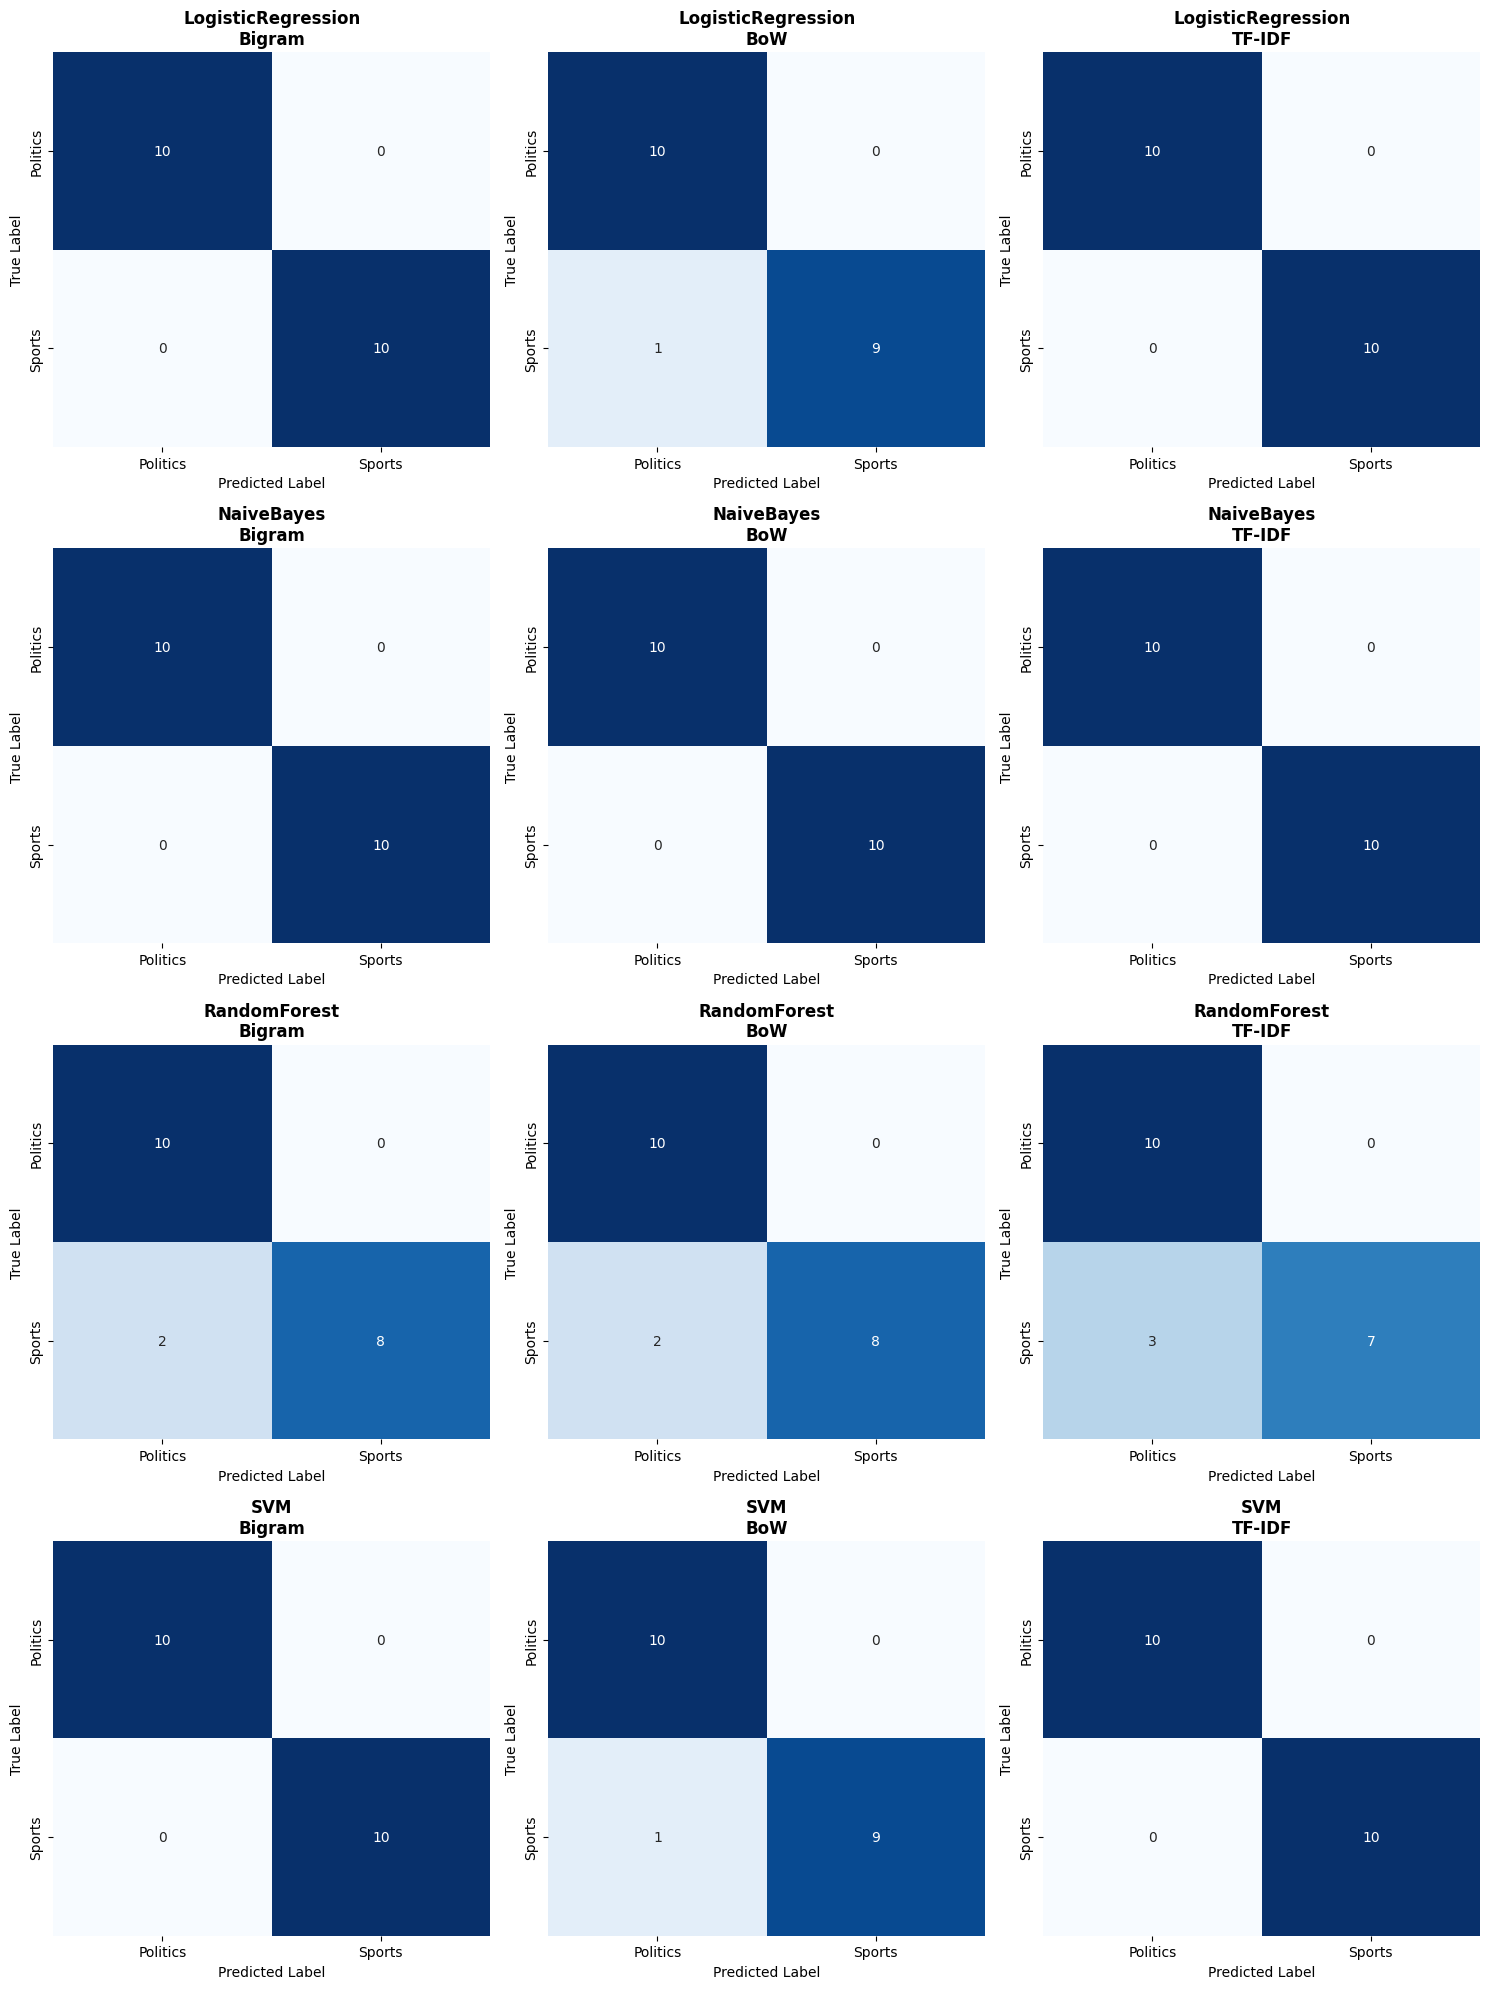

In [23]:
# Crecating detailed Confusion Matrices for all combinations

def plot_confusion_matrices(trainer, y_test):
    # Get unique combinations
    models = set([k.split('_')[0] for k in trainer.results.keys()])
    features = set(['_'.join(k.split('_')[1:]) for k in trainer.results.keys()])

    n_models = len(models)
    n_features = len(features)

    fig, axes = plt.subplots(n_models, n_features, figsize=(5*n_features, 5*n_models))

    if n_models == 1:
        axes = axes.reshape(1, -1)
    if n_features == 1:
        axes = axes.reshape(-1, 1)

    for i, model in enumerate(sorted(models)):
        for j, feature in enumerate(sorted(features)):
            model_key = f"{model}_{feature}"

            if model_key in trainer.results:
                cm = trainer.results[model_key]['confusion_matrix']

                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                           ax=axes[i, j], cbar=False,
                           xticklabels=['Politics', 'Sports'],
                           yticklabels=['Politics', 'Sports'])

                axes[i, j].set_title(f'{model}\n{feature}', fontsize=12, fontweight='bold')
                axes[i, j].set_ylabel('True Label')
                axes[i, j].set_xlabel('Predicted Label')

    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot confusion matrices
plot_confusion_matrices(trainer, y_test)

In [24]:
# Examine Misclassified Examples of Best Performer(if any)

def perform_error_analysis(trainer, X_test, y_test, best_model_info):
    """
    Analyze misclassified examples
    """
    print("=" * 70)
    print("ERROR ANALYSIS")
    print("=" * 70)

    # Get best model predictions
    model_key = f"{best_model_info['Model']}_{best_model_info['Features']}"
    predictions = trainer.results[model_key]['predictions']

    # Find misclassified examples
    misclassified_idx = np.where(predictions != y_test)[0]

    print(f"\nTotal misclassified: {len(misclassified_idx)} out of {len(y_test)}")
    print(f"Error rate: {len(misclassified_idx)/len(y_test)*100:.2f}%")

    # Analyze misclassifications by type
    false_positives = []  # Predicted sports, actually politics
    false_negatives = []  # Predicted politics, actually sports

    for idx in misclassified_idx:
        if predictions[idx] == 'sports' and y_test[idx] == 'politics':
            false_positives.append(idx)
        elif predictions[idx] == 'politics' and y_test[idx] == 'sports':
            false_negatives.append(idx)

    print(f"\nFalse Positives (predicted sports, actually politics): {len(false_positives)}")
    print(f"False Negatives (predicted politics, actually sports): {len(false_negatives)}")

    # Show some examples
    print("\n" + "-" * 70)
    print("MISCLASSIFIED EXAMPLES")
    print("-" * 70)

    if len(false_positives) > 0:
        print("\nFalse Positives (up to 3 examples):")
        for i, idx in enumerate(false_positives[:3]):
            print(f"\nExample {i+1}:")
            print(f"True label: {y_test[idx]}")
            print(f"Predicted: {predictions[idx]}")
            print(f"Text: {X_test[idx][:200]}...")

    if len(false_negatives) > 0:
        print("\nFalse Negatives (up to 3 examples):")
        for i, idx in enumerate(false_negatives[:3]):
            print(f"\nExample {i+1}:")
            print(f"True label: {y_test[idx]}")
            print(f"Predicted: {predictions[idx]}")
            print(f"Text: {X_test[idx][:200]}...")

    return misclassified_idx

# Perform error analysis
misclassified_idx = perform_error_analysis(trainer, X_test, y_test, best_model)

ERROR ANALYSIS

Total misclassified: 0 out of 20
Error rate: 0.00%

False Positives (predicted sports, actually politics): 0
False Negatives (predicted politics, actually sports): 0

----------------------------------------------------------------------
MISCLASSIFIED EXAMPLES
----------------------------------------------------------------------


In [25]:
def save_models_and_data(trainer, extractor, results_df):
    """
    Save trained models and generate data for report
    """
    print("=" * 70)
    print("SAVING MODELS AND GENERATING REPORT DATA")
    print("=" * 70)

    # Save best models
    best_models_info = results_df.nlargest(3, 'Accuracy')

    print("\nSaving top 3 models...")
    for idx, row in best_models_info.iterrows():
        model_key = f"{row['Model']}_{row['Features']}"
        model = trainer.models[model_key]

        filename = f"model_{model_key}.pkl"
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Saved: {filename}")

    # Save vectorizers
    print("\nSaving feature extractors...")
    for name, vectorizer in extractor.vectorizers.items():
        filename = f"vectorizer_{name}.pkl"
        with open(filename, 'wb') as f:
            pickle.dump(vectorizer, f)
        print(f"Saved: {filename}")

    # Generate report statistics
    report_stats = {
        'total_samples': len(df),
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'num_features': {
            'BoW': X_train_bow.shape[1],
            'TF-IDF': X_train_tfidf.shape[1],
            'Bigram': X_train_bigram.shape[1],
        },
        'best_model': {
            'name': f"{best_model['Model']}_{best_model['Features']}",
            'accuracy': best_model['Accuracy'],
            'f1_score': best_model['F1-Score'],
            'cv_mean': best_model['CV Mean'],
            'cv_std': best_model['CV Std']
        },
        'all_results': results_df.to_dict('records')
    }

    # Save report stats
    import json
    with open('report_statistics.json', 'w') as f:
        json.dump(report_stats, f, indent=2)

    print("\nSaved report_statistics.json")

    # Create summary text
    summary = f"""
SPORTS VS POLITICS TEXT CLASSIFICATION - PROJECT SUMMARY
{'='*70}

DATASET INFORMATION:
- Total samples: {report_stats['total_samples']}
- Training samples: {report_stats['train_samples']}
- Testing samples: {report_stats['test_samples']}
- Classes: Sports, Politics (balanced)

FEATURE EXTRACTION METHODS:
1. Bag of Words (BoW): {report_stats['num_features']['BoW']} features
2. TF-IDF: {report_stats['num_features']['TF-IDF']} features
3. Bigrams (1-2): {report_stats['num_features']['Bigram']} features

MACHINE LEARNING MODELS TESTED:
1. Naive Bayes (Multinomial)
2. Logistic Regression
3. Support Vector Machine (Linear kernel)
4. Random Forest (100 estimators)

BEST PERFORMING MODEL:
- Model: {report_stats['best_model']['name']}
- Test Accuracy: {report_stats['best_model']['accuracy']:.4f}
- F1-Score: {report_stats['best_model']['f1_score']:.4f}
- Cross-validation: {report_stats['best_model']['cv_mean']:.4f} (+/- {report_stats['best_model']['cv_std']:.4f})

TOP 3 MODEL CONFIGURATIONS:
"""

    for i, row in best_models_info.iterrows():
        summary += f"\n{i+1}. {row['Model']} with {row['Features']}"
        summary += f"\n   Accuracy: {row['Accuracy']:.4f}, F1: {row['F1-Score']:.4f}\n"

    summary += f"\n{'='*70}\n"

    with open('project_summary.txt', 'w') as f:
        f.write(summary)

    print("\nSaved project_summary.txt")
    print("\n" + "=" * 70)
    print("All models and data saved successfully!")
    print("=" * 70)

    return report_stats

# Save everything
report_stats = save_models_and_data(trainer, extractor, results_df)

# Display summary
print("\n")
with open('project_summary.txt', 'r') as f:
    print(f.read())

SAVING MODELS AND GENERATING REPORT DATA

Saving top 3 models...
Saved: model_NaiveBayes_BoW.pkl
Saved: model_SVM_TF-IDF.pkl
Saved: model_LogisticRegression_TF-IDF.pkl

Saving feature extractors...
Saved: vectorizer_bow.pkl
Saved: vectorizer_tfidf.pkl
Saved: vectorizer_(1, 2)-gram.pkl
Saved: vectorizer_(1, 3)-gram.pkl

Saved report_statistics.json

Saved project_summary.txt

All models and data saved successfully!



SPORTS VS POLITICS TEXT CLASSIFICATION - PROJECT SUMMARY

DATASET INFORMATION:
- Total samples: 97
- Training samples: 77
- Testing samples: 20
- Classes: Sports, Politics (balanced)

FEATURE EXTRACTION METHODS:
1. Bag of Words (BoW): 1000 features
2. TF-IDF: 1000 features
3. Bigrams (1-2): 1000 features

MACHINE LEARNING MODELS TESTED:
1. Naive Bayes (Multinomial)
2. Logistic Regression
3. Support Vector Machine (Linear kernel)
4. Random Forest (100 estimators)

BEST PERFORMING MODEL:
- Model: NaiveBayes_BoW
- Test Accuracy: 1.0000
- F1-Score: 1.0000
- Cross-validation: 0

In [26]:
# Creating Interactive Prediction Interface

def create_prediction_interface(trainer, extractor, best_model_info):
    """
    Create an interactive interface for making predictions
    """
    model_key = f"{best_model_info['Model']}_{best_model_info['Features']}"
    model = trainer.models[model_key]
    feature_type = best_model_info['Features']
    vectorizer = extractor.vectorizers[feature_type.lower().replace('-', '')]

    def predict_text(text):
        """
        Predict the class of input text
        """
        # Transform text
        text_vectorized = vectorizer.transform([text])

        # Make prediction
        prediction = model.predict(text_vectorized)[0]

        # Get probability if available
        if hasattr(model, 'predict_proba'):
            proba = model.predict_proba(text_vectorized)[0]
            confidence = max(proba)

            return {
                'text': text,
                'prediction': prediction,
                'confidence': confidence,
                'probabilities': {
                    'politics': proba[0] if prediction == 'politics' else proba[1],
                    'sports': proba[1] if prediction == 'sports' else proba[0]
                }
            }
        else:
            return {
                'text': text,
                'prediction': prediction,
                'confidence': None
            }

    # Test with some examples
    print("=" * 70)
    print("TESTING PREDICTION INTERFACE")
    print("=" * 70)

    test_examples = [
        "The basketball team won the championship game in overtime with a buzzer-beater shot.",
        "The parliament passed the new healthcare legislation after months of debate.",
        "The striker scored a hat-trick in the final match of the season.",
        "The president announced new foreign policy initiatives at the summit.",
        "The Olympic athlete broke the world record in the 100-meter dash.",
    ]

    for example in test_examples:
        result = predict_text(example)
        print(f"\nText: {example[:80]}...")
        print(f"Prediction: {result['prediction'].upper()}")
        if result['confidence']:
            print(f"Confidence: {result['confidence']:.4f}")
            print(f"Probabilities: Politics={result['probabilities']['politics']:.4f}, "
                  f"Sports={result['probabilities']['sports']:.4f}")

    return predict_text

# Create prediction interface
predict_text = create_prediction_interface(trainer, extractor, best_model)

print("\n" + "=" * 70)
print("You can now use predict_text('your text here') to classify new articles!")
print("=" * 70)

TESTING PREDICTION INTERFACE

Text: The basketball team won the championship game in overtime with a buzzer-beater s...
Prediction: SPORTS
Confidence: 1.0000
Probabilities: Politics=1.0000, Sports=1.0000

Text: The parliament passed the new healthcare legislation after months of debate....
Prediction: POLITICS
Confidence: 1.0000
Probabilities: Politics=1.0000, Sports=1.0000

Text: The striker scored a hat-trick in the final match of the season....
Prediction: SPORTS
Confidence: 0.9999
Probabilities: Politics=0.9999, Sports=0.9999

Text: The president announced new foreign policy initiatives at the summit....
Prediction: POLITICS
Confidence: 0.9999
Probabilities: Politics=0.9999, Sports=0.9999

Text: The Olympic athlete broke the world record in the 100-meter dash....
Prediction: SPORTS
Confidence: 0.9985
Probabilities: Politics=0.9985, Sports=0.9985

You can now use predict_text('your text here') to classify new articles!
